### Convolution Neural Network

To start Kears with Theano backend please run the following command while starting jupter notebook.

KERAS_BACKEND=theano jupyter notebook

In the world of image classification, CNN has become the go to algorithm to build efficient models. CNN’s are similar to ordinary neural network, except that it explicitly assumes that the inputs are images, which allows us to encode certain properties into the architecture. These then make the forward function efficient to implement and reduces the parameters in the network. The neurons are arranged in 3 dimensions i.e., width, height and depth.

Let's consider CIFAR-10 (Canadian Institute for Advanced Research), it’s a standard computer vision and deep learning image dataset. It consists of 60,000 color photos of 32 by 32 pixel squared with RGB for each pixel, divided into 10 classes, that include common objects such as airplanes, automobiles, birds, cats, deer, dog, frog, horse, ship, and truck. Essentially each image is of size 32x32x3 (width x height x RGB color channels).

CNN consists of four main types of layers i.e., input layer, convolution layer, pooling layer, fully-connected layer. 
Input layer will hold the raw pixel, so an image of CIFAR-10 will have 32x32x3 dimensions at input layer. Convolution layer will compute a dot product between the weights of small local region from input layer, so if we decide to have 5 filters the resulted reduced dimension will be 32x32x5. RELU layer will apply an element wise activation function which will not affect the dimension. Pool layer will down sample the spatial dimension along width and height, resulting in dimension 16x16x5. Finally the fully connected layer will compute the class score, and the resulted dimension will be a single vector 1x1x10 (10 class scores). Each neural in this layer is connected to all numbers in the previous volume.

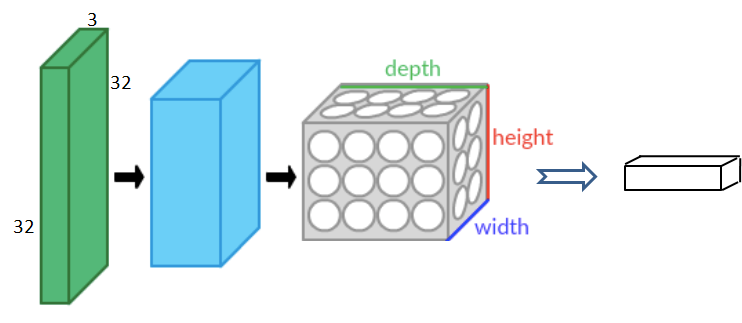

In [1]:
from IPython.display import Image
Image(filename='../Chapter 6 Figures/CNN.png', width=600)

In [1]:
import keras
keras.backend.backend()
keras.backend.image_dim_ordering()

# Ensure to set the image dimension appropriately
K = keras.backend.backend()
if K=='tensorflow':
    keras.backend.set_image_dim_ordering('tf')
else:
    keras.backend.set_image_dim_ordering('th')

Using Theano backend.


In [2]:
from matplotlib import pyplot as plt
%matplotlib inline

import numpy as np
np.random.seed(2017)

from keras.models import Sequential
from keras.datasets import cifar10
from keras.layers import Dense, Dropout, Activation, Convolution2D, MaxPooling2D, Flatten
from keras.utils import np_utils
from keras.preprocessing import sequence

from keras import backend as K
from keras.utils.visualize_util import plot
from IPython.display import SVG, display
from keras.utils.visualize_util import model_to_dot, plot

/home/manohar/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [3]:
img_rows, img_cols = 32, 32
img_channels = 3

batch_size = 256
nb_classes = 10
nb_epoch = 4
nb_filters = 10
nb_conv = 3
nb_pool = 2

if K.image_dim_ordering() == 'th':
    input_shape = (3, img_rows, img_cols)
else:
    input_shape = (img_rows, img_cols, 3)
    
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print(('X_train shape:', X_train.shape))
print((X_train.shape[0], 'train samples'))
print((X_test.shape[0], 'test samples'))
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

('X_train shape:', (50000, 3, 32, 32))
(50000, 'train samples')
(10000, 'test samples')


In [4]:
# define two groups of layers: feature (convolutions) and classification (dense)
feature_layers = [
    Convolution2D(nb_filters, nb_conv, nb_conv, input_shape=input_shape),
    Activation('relu'),
    Convolution2D(nb_filters, nb_conv, nb_conv),
    Activation('relu'),
    MaxPooling2D(pool_size=(nb_pool, nb_pool)),
    Flatten(),
]
classification_layers = [
    Dense(512),
    Activation('relu'),
    Dense(nb_classes),
    Activation('softmax')
]

# create complete model
model = Sequential(feature_layers + classification_layers)

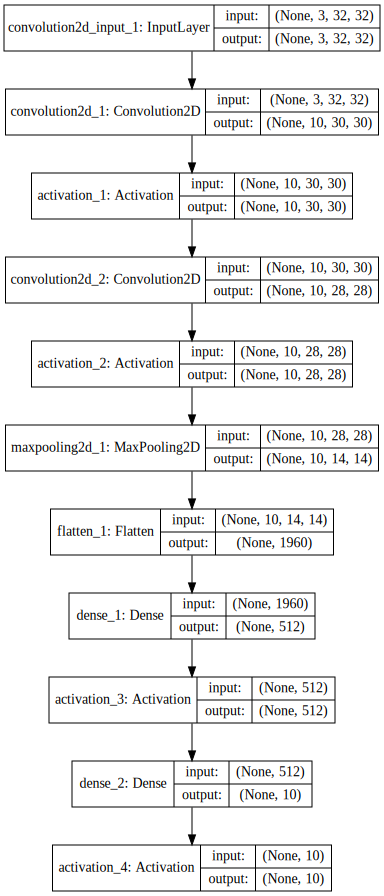

In [5]:
model.compile(loss='categorical_crossentropy', optimizer="adadelta", metrics=['accuracy'])

SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

In [6]:
print((model.summary()))

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
convolution2d_1 (Convolution2D)  (None, 10, 30, 30)    280         convolution2d_input_1[0][0]      
____________________________________________________________________________________________________
activation_1 (Activation)        (None, 10, 30, 30)    0           convolution2d_1[0][0]            
____________________________________________________________________________________________________
convolution2d_2 (Convolution2D)  (None, 10, 28, 28)    910         activation_1[0][0]               
____________________________________________________________________________________________________
activation_2 (Activation)        (None, 10, 28, 28)    0           convolution2d_2[0][0]            
___________________________________________________________________________________________

In [7]:
model.fit(X_train, Y_train, validation_data=(X_test, Y_test), 
          nb_epoch=nb_epoch, batch_size=batch_size, verbose=2)

Train on 50000 samples, validate on 10000 samples
Epoch 1/4
83s - loss: 1.9102 - acc: 0.3235 - val_loss: 1.5988 - val_acc: 0.4268
Epoch 2/4
90s - loss: 1.5174 - acc: 0.4671 - val_loss: 1.4651 - val_acc: 0.4846
Epoch 3/4
93s - loss: 1.3359 - acc: 0.5346 - val_loss: 1.4031 - val_acc: 0.5086
Epoch 4/4
85s - loss: 1.2222 - acc: 0.5739 - val_loss: 1.3008 - val_acc: 0.5483


### Visualization of layers

In [8]:
# visualization
def draw(data, row, col, n):
    plt.subplot(row, col, n)    
    plt.imshow(data)

### Input layer (original image)

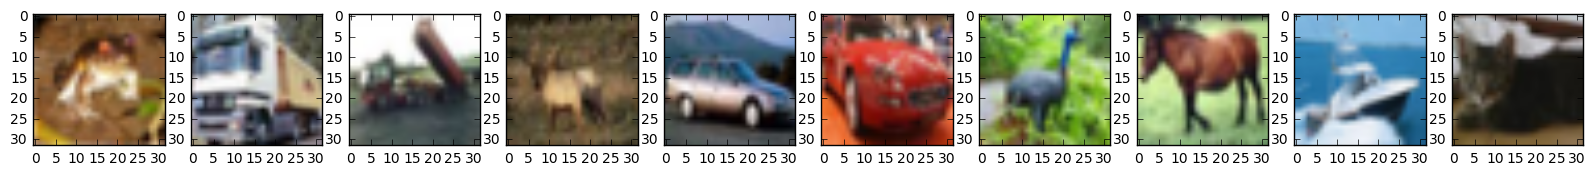

In [9]:
show_size = 10
plt.figure(figsize=(20,20))
for i in range(show_size):
    draw(X_train[i].reshape(3, 32, 32).transpose(1, 2, 0), 1, show_size, i+1)
plt.show()

### First layer

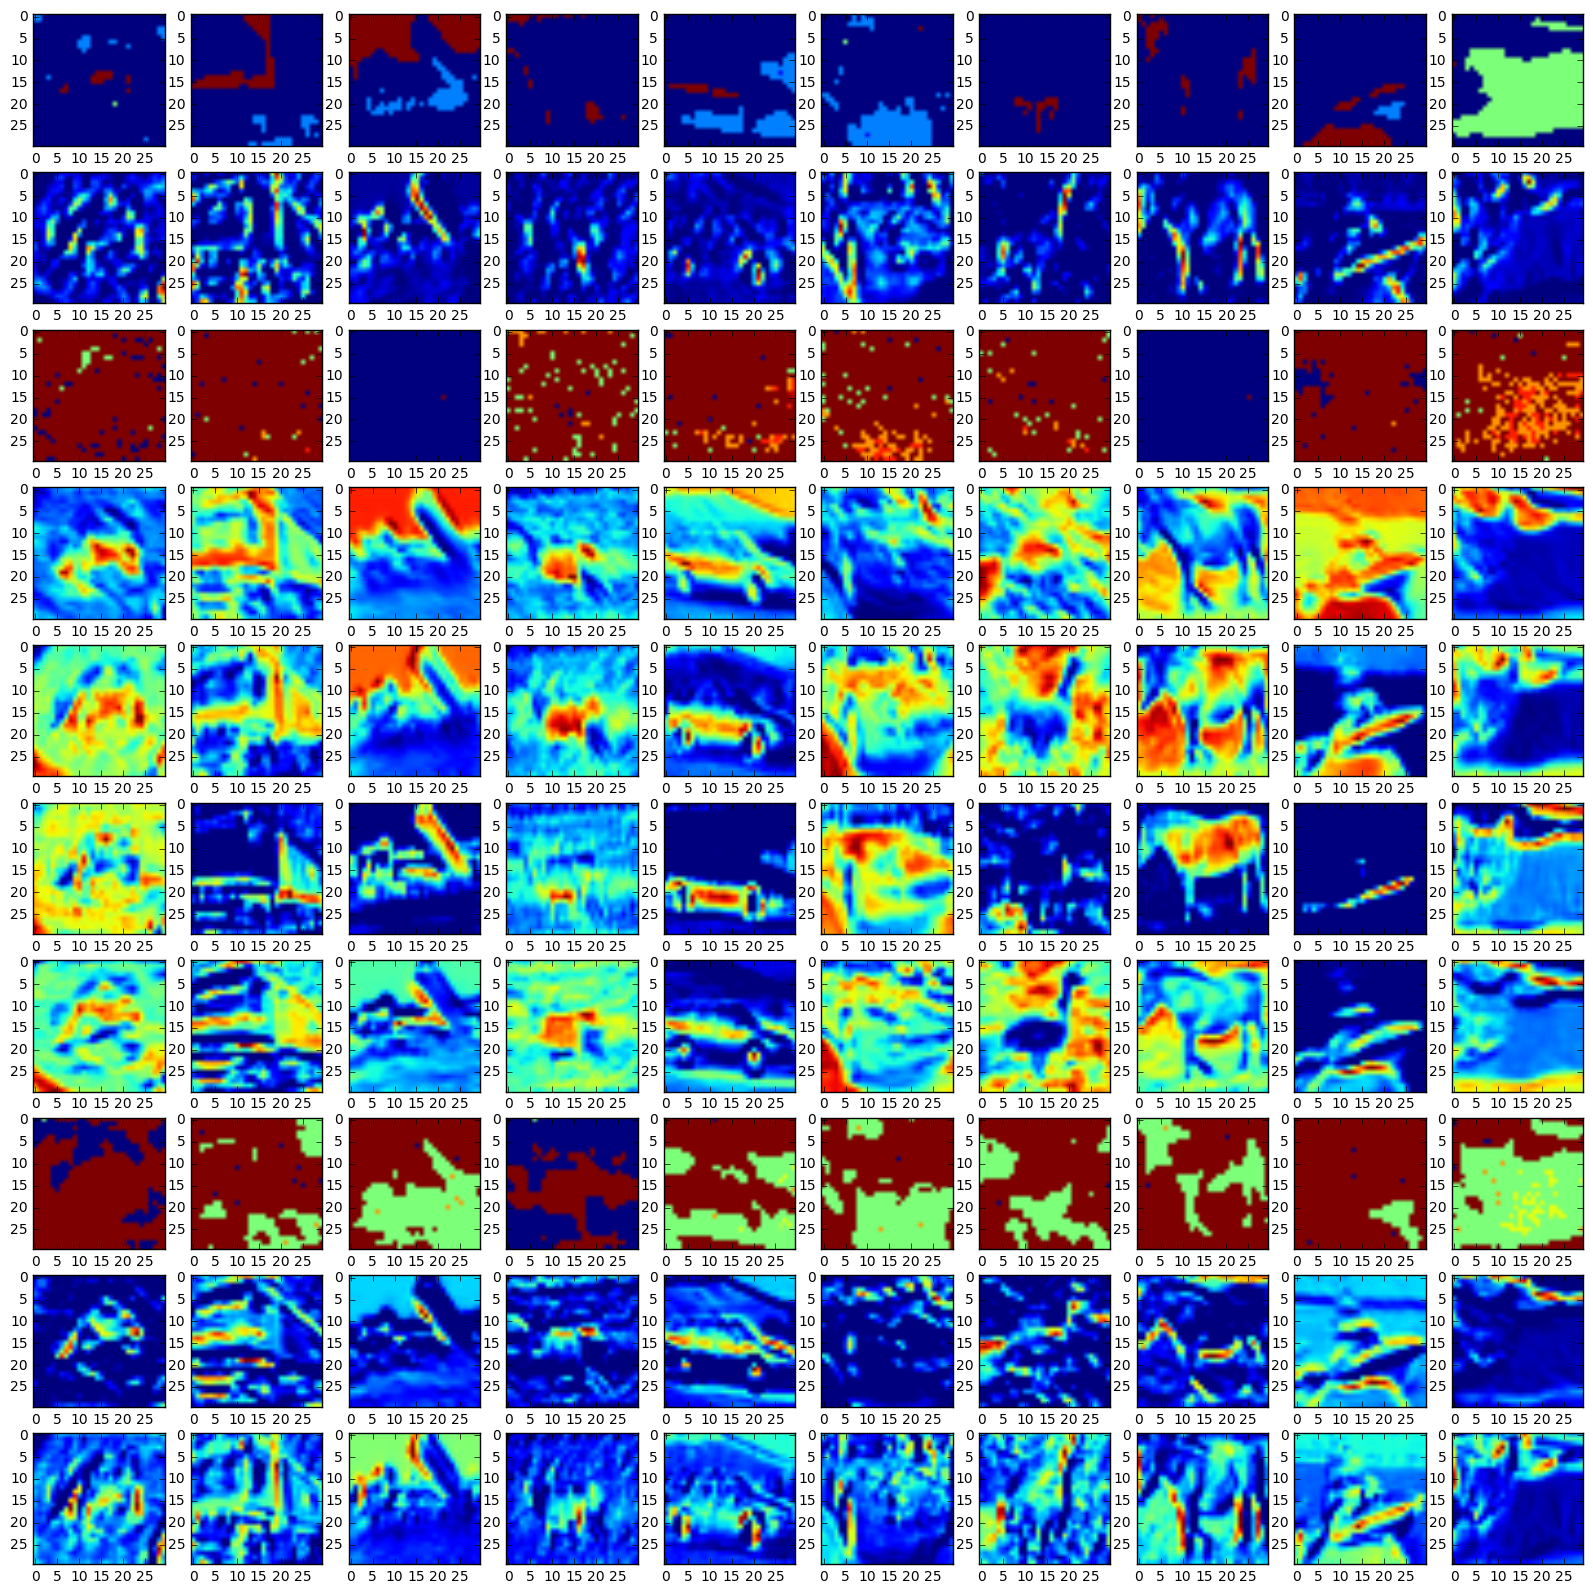

In [10]:
get_first_layer_output = K.function([model.layers[0].input],
                          [model.layers[1].output])
first_layer = get_first_layer_output([X_train[0:show_size]])[0]

plt.figure(figsize=(20,20))

for img_index, filters in enumerate(first_layer, start=1):
    for filter_index, mat in enumerate(filters):
        pos = (filter_index)*show_size+img_index
        draw(mat, nb_filters, show_size, pos)
plt.show()

### Second layer

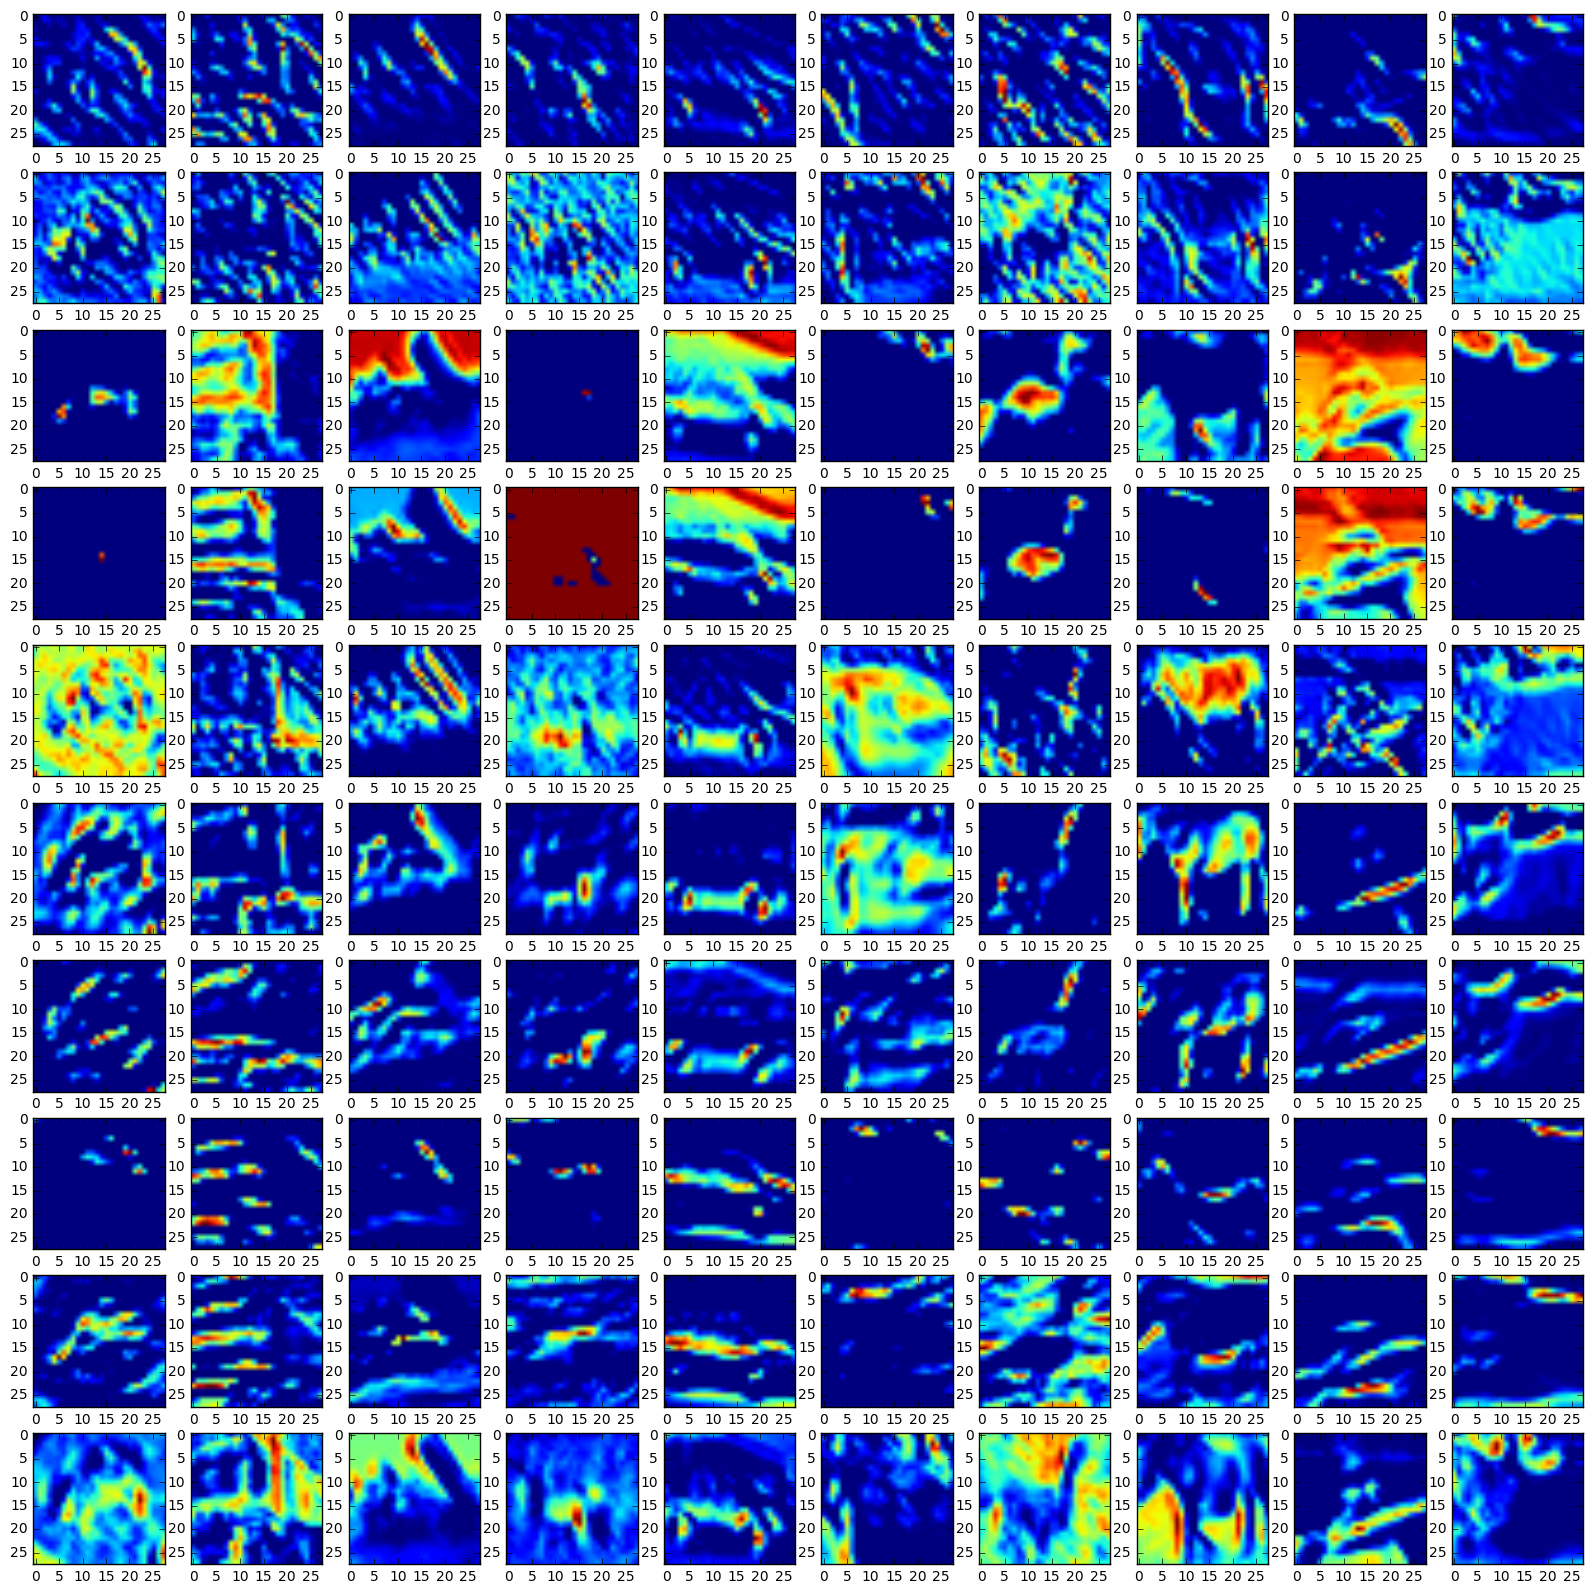

In [11]:
get_second_layer_output = K.function([model.layers[0].input],
                          [model.layers[3].output])
second_layers = get_second_layer_output([X_train[0:show_size]])[0]

plt.figure(figsize=(20,20))

for img_index, filters in enumerate(second_layers, start=1):
    for filter_index, mat in enumerate(filters):
        pos = (filter_index)*show_size+img_index
        draw(mat, nb_filters, show_size, pos)
plt.show()

### Third layer

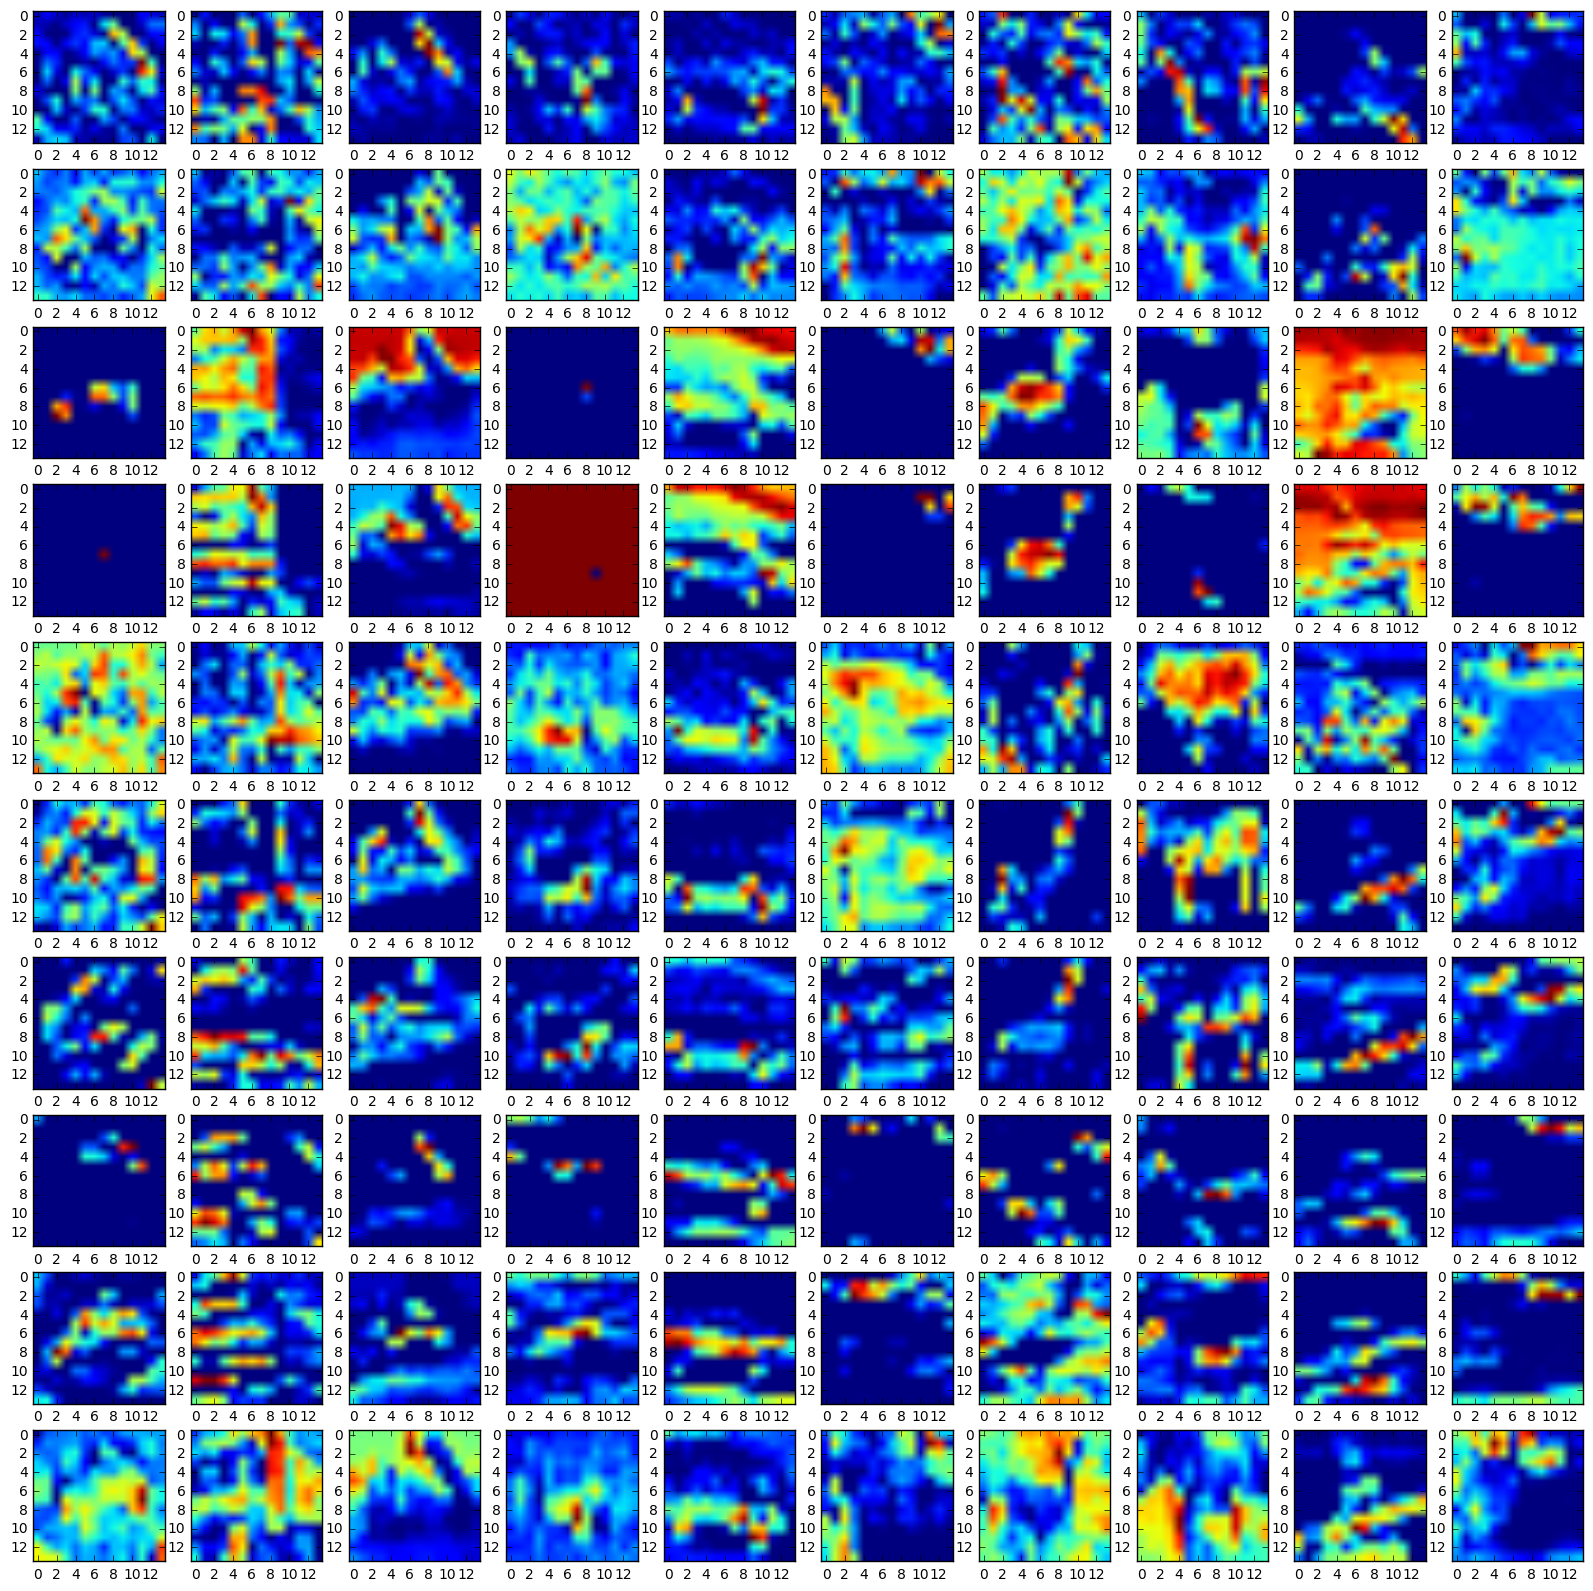

In [12]:
get_third_layer_output = K.function([model.layers[0].input],
                          [model.layers[4].output])
third_layers = get_third_layer_output([X_train[0:show_size]])[0]

plt.figure(figsize=(20,20))

for img_index, filters in enumerate(third_layers, start=1):
    for filter_index, mat in enumerate(filters):
        pos = (filter_index)*show_size+img_index
        mat_size = mat.shape[1]
        draw(mat, nb_filters, show_size, pos)
plt.show()